In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [18]:
dataset = pd.read_csv('../../DataSets/data_set_dra_updated.csv')

x = pd.DataFrame(dataset.iloc[:, 0:5].values)
y = dataset.iloc[:, 5].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

x_inp = [];
y_inp = [];


x_inp.extend(numpy.array(x_train))

y_inp.extend(numpy.array(y_train))

DATA_SIZE = 400000;

decision_tree_w = 10;
random_forest_w = 10;
knn_w = 10;
xg_boost_w = 10;

total_w = decision_tree_w + random_forest_w + knn_w + xg_boost_w;

def randomSample(low, high, size):
    rand_rad = numpy.random.uniform(low, high, size)
    for i in range(0, rand_rad.size):
        rand_rad[i] = round(rand_rad[i], 2)
    return rand_rad

def genDataSet (size):
    s = int(size);
    rand_rad = randomSample(8, 10, s)
    rand_height = randomSample(13, 15, s)
    rand_freq = randomSample(3, 6, s)
    rand_w1 = randomSample(2, 3, s)
    rand_w2 = randomSample(2, 3, s)

    rand_x = []
    for i in range(0, s):
        rand_x.append([rand_height[i], rand_rad[i], rand_w1[i], rand_w2[i], rand_freq[i]])
    return rand_x
    
    


In [19]:
# Decision Tree

from sklearn.tree import DecisionTreeRegressor
DTReg = DecisionTreeRegressor()
DTReg.fit(x_train,y_train)

x_gen = genDataSet(DATA_SIZE * (decision_tree_w/total_w))

x_inp.extend(numpy.array(x_gen))
y_inp.extend(numpy.array(DTReg.predict(x_gen)))

mean_squared_error(y_test, DTReg.predict(x_test))

0.5341832694016518

In [20]:
# KNN

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
 
knn.fit(x_train, y_train)

x_gen = genDataSet(DATA_SIZE * (knn_w/total_w))

x_inp.extend(numpy.array(x_gen))
y_inp.extend(numpy.array(knn.predict(x_gen)))

mean_squared_error(y_test, knn.predict(x_test))


0.3138785868040164

In [21]:
# Random Forest


from sklearn.ensemble import RandomForestRegressor

RFreg = RandomForestRegressor(n_estimators = 10, random_state = 0)

RFreg.fit(x_train,y_train)

x_gen = genDataSet(DATA_SIZE * (random_forest_w/total_w))

x_inp.extend(numpy.array(x_gen))
y_inp.extend(numpy.array(RFreg.predict(x_gen)))

mean_squared_error(y_test, RFreg.predict(x_test))


0.3051686970566797

In [22]:
# XG Boost


import xgboost as xgb

xgb_reg = xgb.XGBRegressor(n_estimators=100, objective='reg:linear', seed = 123)

# Train the model with train data sets
xgb_reg.fit(x_train, y_train)

x_gen = genDataSet(DATA_SIZE * (xg_boost_w/total_w))

x_inp.extend(numpy.array(x_gen))
y_inp.extend(numpy.array(xgb_reg.predict(numpy.array(x_gen))))

mean_squared_error(y_test, xgb_reg.predict(x_test))


C:\Users\omsin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:51:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


0.4404962933617344

In [23]:
# KBNN

import keras
from keras.models import Sequential
from keras.layers import Dense

# Artificial NN

classifier = Sequential()

# Input Layer
classifier.add(Dense(units = 8, activation = 'relu', input_dim = 5))

# 1st Hidden Layer
classifier.add(Dense(units = 12, activation = 'sigmoid'))

# 2nd Hidden Layer
classifier.add(Dense(units = 10, activation = 'sigmoid'))

# 3rd Hidden Layer
classifier.add(Dense(units = 8, activation = 'sigmoid'))

# Output Layer
classifier.add(Dense(units = 1, activation = 'linear'))

In [24]:
x_inp = numpy.asarray(x_inp).astype(numpy.float32)
y_inp = numpy.asarray(y_inp).astype(numpy.float32)

# Training

classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

history=classifier.fit(x_inp, y_inp, batch_size = 10, epochs = 100, validation_data=(x_test,y_test))

Epoch 1/100
46930/46930 [==============================] - 26s 543us/step - loss: 9.7061 - accuracy: 0.0000e+00 - val_loss: 7.2155 - val_accuracy: 0.0000e+00
Epoch 2/100
46930/46930 [==============================] - 23s 498us/step - loss: 5.1020 - accuracy: 0.0000e+00 - val_loss: 5.9048 - val_accuracy: 0.0000e+00
Epoch 3/100
46930/46930 [==============================] - 24s 511us/step - loss: 3.4395 - accuracy: 0.0000e+00 - val_loss: 4.8163 - val_accuracy: 0.0000e+00
Epoch 4/100
46930/46930 [==============================] - 26s 555us/step - loss: 2.2900 - accuracy: 0.0000e+00 - val_loss: 3.8041 - val_accuracy: 0.0000e+00
Epoch 5/100
46930/46930 [==============================] - 26s 558us/step - loss: 1.9303 - accuracy: 0.0000e+00 - val_loss: 5.3905 - val_accuracy: 0.0000e+00
Epoch 6/100
46930/46930 [==============================] - 24s 512us/step - loss: 1.7582 - accuracy: 0.0000e+00 - val_loss: 5.3783 - val_accuracy: 0.0000e+00
Epoch 7/100
46930/46930 [===========================

In [25]:
y_inp

array([-0.5163246, -3.2355459, -2.9801757, ..., -1.9412857, -2.7568426,
       -7.5405083], dtype=float32)

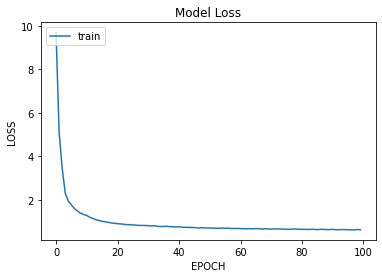

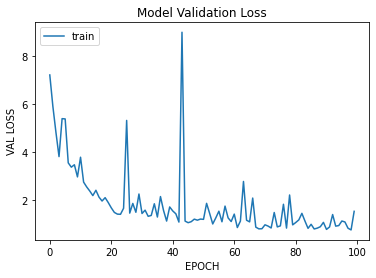

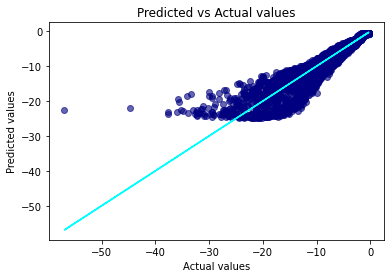

In [26]:
# Prediction
import matplotlib.pyplot as plt

y_pred = classifier.predict(x_test)
mean_squared_error(y_test,y_pred)
r2_score(y_test, y_pred)

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(history.history['val_loss'])
plt.title('Model Validation Loss')
plt.ylabel('VAL LOSS')
plt.xlabel('EPOCH')
plt.legend(['train'], loc='upper left')
plt.show()

def generatePredictionPlot(y_pred, y_test):
    plt.scatter(x=y_test, y=y_pred, c='navy', alpha=0.6)
    plt.plot(y_test, y_test,color='cyan')
    plt.title('Predicted vs Actual values')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.show()
    
generatePredictionPlot(y_pred, y_test)

In [27]:
mean_squared_error(y_test,y_pred)

1.5174765896869113

In [28]:
r2_score(y_test, y_pred)

0.9216278762630277